In [199]:
import numpy as np
a = .50
num_sets = 7
num_games_per_set = 3
outcomes = np.random.rand(num_sets,num_games_per_set)
print "outcomes"
print outcomes
num_simulations = 50000

outcomes
[[0.61806456 0.05842989 0.15807006]
 [0.40538419 0.34757705 0.73945192]
 [0.59673622 0.26565699 0.83286472]
 [0.55370611 0.15636686 0.6303989 ]
 [0.54921405 0.34374996 0.4317585 ]
 [0.13380119 0.65968967 0.66319491]
 [0.33617101 0.83757946 0.64279068]]


In [127]:
def winner_per_set(outcomes_in_set, a):
    a_wins = 0
    a_wins_list = []
    num_games = len(outcomes_in_set)
    for outcome in outcomes_in_set:
        if outcome <= a:
            a_wins = a_wins + 1
            a_wins_list.append(outcome)
    b_wins = num_games - a_wins
    overall_winner = ""
    if a_wins > b_wins:
        overall_winner = "a"
    else:
        overall_winner = "b"
    return a_wins, a_wins_list, overall_winner 

In [128]:
# testing to make sure this is working as expected
winner_per_set([.9,.91,.1], a)

(1, [0.1], 'b')

In [194]:
def winner_sets(outcomes_all, a):
    b = 1 - a
    a_wins = 0
    a_wins_list = []
    num_games = len(outcomes_all)
    
    for single_set in outcomes_all:
        _, _, overall_winner = winner_per_set(single_set, a)
        if overall_winner == "a":
            a_wins = a_wins + 1
            a_wins_list.append(single_set)

    b_wins = num_games - a_wins
    overall_winner = ""
    if a_wins > b_wins:
        overall_winner = "a"
    else:
        overall_winner = "b"
    return a_wins, a_wins_list, overall_winner 

In [195]:
# testing to make sure this is working as expected
winner_sets([[.9,.9,.1], [.9,.1,.1], [.9,.91,.1]], a)

(1, [[0.9, 0.1, 0.1]], 'b')

In [196]:
_, _, set_winner = winner_sets(outcomes, a)
print "set winner"
print set_winner

_, _, continuous_winner = winner_per_set(outcomes.flatten(), a)
print "continuous winner"
print continuous_winner

set winner
b
continuous winner
b


### Running Simulations

In [197]:
def run_simulations(num_simulations, a, num_sets, num_games_per_set):
    num_a_set_wins = 0
    num_a_continuous_wins = 0
    
    for sim_num in range(0,num_simulations):
        outcomes = np.random.rand(num_sets,num_games_per_set)

        # calculate set wins
        _, _, set_winner = winner_sets(outcomes, a)
        
        if set_winner == "a":
            num_a_set_wins = num_a_set_wins + 1

        # calculate continous wins
        _, _, continuous_winner = winner_per_set(outcomes.flatten(), a)
        continuous_winners_list.append(continuous_winner)
        if continuous_winner == "a":
            num_a_continuous_wins = num_a_continuous_wins + 1
            
    return num_a_set_wins, num_a_continuous_wins

In [212]:
num_a_set_wins, num_a_continuous_wins = run_simulations(num_simulations, a, num_sets, num_games_per_set)
print "num_a_set_wins"
print num_a_set_wins
print "num_a_continuous_wins"
print num_a_continuous_wins

num_a_set_wins
24878
num_a_continuous_wins
25017


### Graphing how set wins and continuous wins changes depending on the probability at fixed 21 games in continuous version and 7 sets of 3 in the set version

In [213]:
num_probabilities = 100
a_probabilities = np.random.rand(num_probabilities,1).flatten()
a_simulation_set_wins = []
a_simulation_continuous_wins = []
for a_probability in a_probabilities:
    a_simulation_set_win, a_simulation_continous_win = run_simulations(num_simulations, a_probability, num_sets, num_games_per_set)
    a_simulation_set_wins.append(a_simulation_set_win)
    a_simulation_continuous_wins.append(a_simulation_continous_win)

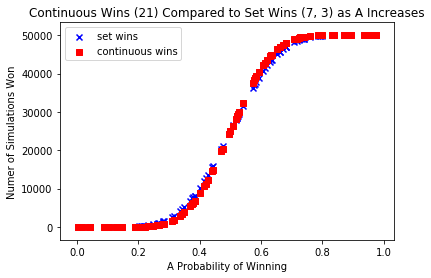

In [218]:
import matplotlib.pyplot as plt
plt.scatter(a_probabilities, a_simulation_set_wins, c='b', marker='x', label='set wins')
plt.scatter(a_probabilities, a_simulation_continuous_wins, c='r', marker='s', label='continuous wins')
plt.legend(loc='upper left')
plt.title("Continuous Wins (21) Compared to Set Wins (7, 3) as A Increases")
plt.xlabel("A Probability of Winning")
plt.ylabel("Numer of Simulations Won")
plt.show()


### ### Graphing how set wins and continuous wins changes as number of games per set goes up

In [234]:
a = .51

In [240]:
numbers_of_games_per_set = np.arange(3,101,10)
a_simulation_set_wins = []
a_simulation_continuous_wins = []
for number_of_games_per_set in numbers_of_games_per_set:
    a_simulation_set_win, a_simulation_continous_win = run_simulations(num_simulations, a, num_sets, number_of_games_per_set)
    a_simulation_set_wins.append(a_simulation_set_win)
    a_simulation_continuous_wins.append(a_simulation_continous_win)

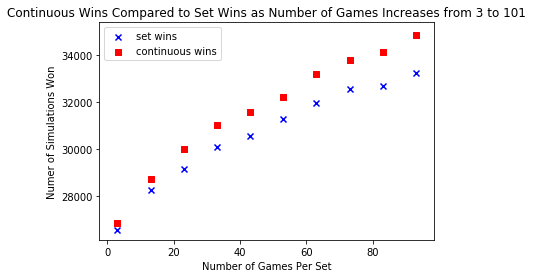

In [242]:
import matplotlib.pyplot as plt
plt.scatter(numbers_of_games_per_set, a_simulation_set_wins, c='b', marker='x', label='set wins')
plt.scatter(numbers_of_games_per_set, a_simulation_continuous_wins, c='r', marker='s', label='continuous wins')
plt.legend(loc='upper left')
plt.title("Continuous Wins Compared to Set Wins as Number of Games Increases from 3 to 101 at probability .51")
plt.xlabel("Number of Games Per Set")
plt.ylabel("Numer of Simulations Won")
plt.show()

In [247]:
a = .7
numbers_of_games_per_set = np.arange(3,21,2)
a_simulation_set_wins = []
a_simulation_continuous_wins = []
for number_of_games_per_set in numbers_of_games_per_set:
    a_simulation_set_win, a_simulation_continous_win = run_simulations(num_simulations, a, num_sets, number_of_games_per_set)
    a_simulation_set_wins.append(a_simulation_set_win)
    a_simulation_continuous_wins.append(a_simulation_continous_win)

In [248]:
a_simulation_set_wins

[47816, 49120, 49671, 49877, 49949, 49971, 49996, 49998, 50000]

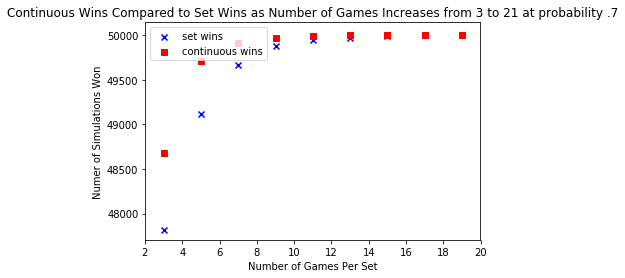

In [250]:
import matplotlib.pyplot as plt
plt.scatter(numbers_of_games_per_set, a_simulation_set_wins, c='b', marker='x', label='set wins')
plt.scatter(numbers_of_games_per_set, a_simulation_continuous_wins, c='r', marker='s', label='continuous wins')
plt.legend(loc='upper left')
plt.title("Continuous Wins Compared to Set Wins as Number of Games Increases from 3 to 21 at probability .7")
plt.xlabel("Number of Games Per Set")
plt.ylabel("Numer of Simulations Won")
plt.show()

### APPENDIX

In [156]:
num_simulations = 500000

num_a_set_wins = 0
num_a_continuous_wins = 0
set_winners_list = []
continuous_winners_list = []

for sim_num in range(0,num_simulations):
    outcomes = np.random.rand(num_sets,num_games_per_set)
    
    # calculate set wins
    _, _, set_winner = winner_sets(outcomes, a)
    set_winners_list.append(set_winner)
    if set_winner == "a":
        num_a_set_wins = num_a_set_wins + 1
        
    # calculate continous wins
    _, _, continuous_winner = winner_per_set(outcomes.flatten(), a)
    continuous_winners_list.append(continuous_winner)
    if continuous_winner == "a":
        num_a_continuous_wins = num_a_continuous_wins + 1
        